# Moment Forecasting Example

## Loading Moment Model

In [1]:
import os
import sys
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import MomentModel
from samay.dataset import MomentDataset
from samay.utils import load_args

repo = "AutonLab/MOMENT-1-large"
config = {
    "task_name": "forecasting",
    "forecast_horizon": 192,
    "head_dropout": 0.1,
    "weight_decay": 0,
    "freeze_encoder": True,  # Freeze the patch embedding layer
    "freeze_embedder": True,  # Freeze the transformer encoder
    "freeze_head": False,  # The linear forecasting head must be trained
}
mmt = MomentModel(config=config, repo=repo)

INFO:p-3550900:t-140639624742720:moment.py:_validate_inputs:Setting d_model to 1024


Loading MOMENT model from AutonLab/MOMENT-1-large


INFO:p-3550900:t-140639624742720:moment.py:_get_transformer_backbone:Initializing pre-trained transformer from google/flan-t5-large.
INFO:p-3550900:t-140639624742720:moment.py:_get_transformer_backbone:Enabling gradient checkpointing.


## Finetune Moment Model on the ETT dataset

In [2]:
train_dataset = MomentDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                              mode='train', horizon_len=192)
val_dataset = MomentDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv',
                            mode='test', horizon_len=192)

In [3]:
finetuned_model = mmt.finetune(train_dataset, task_name="forecasting")
mmt.evaluate(val_dataset, task_name="forecasting")

/nethome/sanand315/Samay/.venv/lib/python3.11/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 0: Train loss: 0.069
Epoch 1: Train loss: 0.064
Epoch 2: Train loss: 0.060
Epoch 3: Train loss: 0.056
Epoch 4: Train loss: 0.053


{'mse': 0.0646332,
 'mae': 0.059077125,
 'mase': 1.8721027,
 'mape': 0.025354875,
 'rmse': 0.2542306,
 'nrmse': 0.02672074303751667,
 'smape': 0.20617108,
 'msis': 0.046556044,
 'nd': 26.504014618362795}

## Test the Finetuned Model

(24, 64, 512)


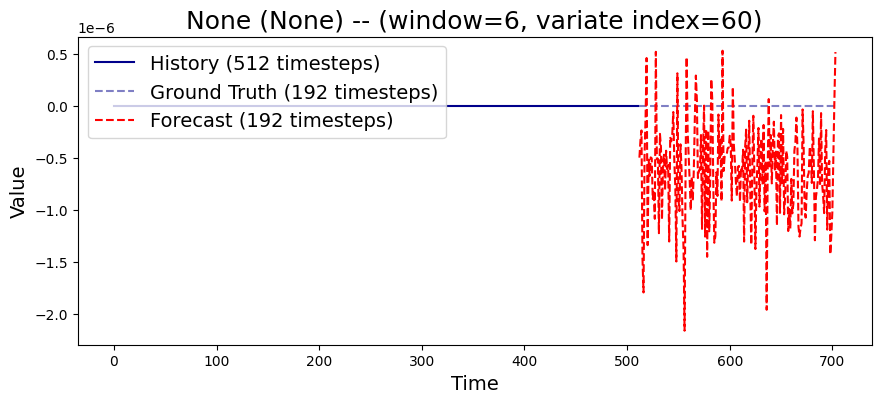

In [4]:
mmt.plot(val_dataset, task_name='forecasting')